In [ ]:
import pandas as pd
import numpy as np
# Load the CSV file
data = pd.read_csv("C://Users//Lenovo//Downloads//archive (1)//sign_mnist_train.csv")

# Display the first few rows
print(data.head())

# Check the shape of the dataset
print(f"Dataset shape: {data.shape}")

# Check the distribution of classes
print("Unique classes and their counts:")
print(data['label'].value_counts())

# Determine the number of unique classes
num_classes = data['label'].nunique()
print(f"Number of unique classes: {num_classes}")


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Separate features and labels
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

# Normalize the pixel values to be between 0 and 1
X = X / 255.0

# Reshape the data to match the input shape of CNN



X = X.reshape(-1, 28, 28, 1)

# One-hot encode the labels
lb = LabelBinarizer()
y = lb.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Assuming 24 gesture classes instead of 25
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(24, activation='softmax')  # Updated to 24 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Re-run the training
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val))


Epoch 1/10
687/687 [==============================] - 15s 20ms/step - loss: 1.0036 - accuracy: 0.6878 - val_loss: 0.1561 - val_accuracy: 0.9463
Epoch 2/10
687/687 [==============================] - 13s 19ms/step - loss: 0.0741 - accuracy: 0.9794 - val_loss: 0.0216 - val_accuracy: 0.9965
Epoch 3/10
687/687 [==============================] - 14s 20ms/step - loss: 0.0140 - accuracy: 0.9973 - val_loss: 0.0058 - val_accuracy: 0.9996
Epoch 4/10
687/687 [==============================] - 15s 21ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.0161 - val_accuracy: 0.9951
Epoch 5/10
687/687 [==============================] - 16s 23ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 4.5774e-04 - val_accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 16s 24ms/step - loss: 2.1875e-04 - accuracy: 1.0000 - val_loss: 2.5326e-04 - val_accuracy: 1.0000
Epoch 7/10
687/687 [==============================] - 17s 25ms/step - loss: 1.3593e-04 - accuracy: 1.0000 - val_loss: 2.5466

In [ ]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_acc}")

172/172 [==============================] - 1s 8ms/step - loss: 9.9450e-05 - accuracy: 1.0000
Validation accuracy: 1.0


1/1 [==============================] - 0s 169ms/step


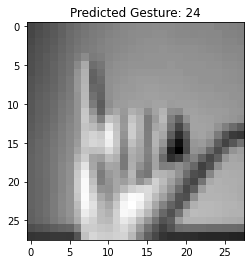

In [ ]:
import matplotlib.pyplot as plt

# Predict on a sample image from the validation set
sample_image = X_val[0].reshape(1, 28, 28, 1)
prediction = model.predict(sample_image)
predicted_label = lb.inverse_transform(prediction)[0]

# Display the image with the predicted label
plt.imshow(X_val[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Gesture: {predicted_label}")
plt.show()

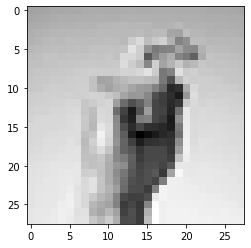

In [ ]:
plt.imshow(X_val[5].reshape(28, 28), cmap='gray')